# UNDERSTAND THE PROBLEM STATEMENT


Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Note that:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# IMPORT LIBRARIES AND DATASETS

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# Drop id

cardio_df = cardio_df.drop(columns = 'id')

In [5]:
# since the age is given in days, we convert it into years

cardio_df['age'] = cardio_df['age']/365

In [6]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
# checking the null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# Checking the dataframe information

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [9]:
# Statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


MINI CHALLENGE
- Obtain the features of the individuals who are older than 64.8 years old 

In [10]:
cardio_df[cardio_df['age']>64.8]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
395,64.824658,2,160,78.0,140,90,1,1,0,0,1,0
643,64.802740,1,154,79.0,130,80,1,1,0,0,1,0
2936,64.808219,2,156,60.0,140,90,1,1,0,0,1,1
4295,64.849315,1,169,75.0,120,80,1,1,0,0,1,0
9787,64.838356,2,165,70.0,120,80,1,1,0,0,0,0
10422,64.816438,2,177,102.0,130,80,1,2,0,0,1,0
16439,64.821918,1,160,65.0,130,80,3,3,0,0,0,1
18062,64.863014,1,140,48.0,170,100,2,1,0,0,1,1
20931,64.904110,1,165,63.0,150,90,2,1,0,0,1,1
22229,64.838356,2,170,91.0,130,90,1,1,0,0,1,0


# VISUALIZE DATASET

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>],
       [<Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>]], dtype=object)

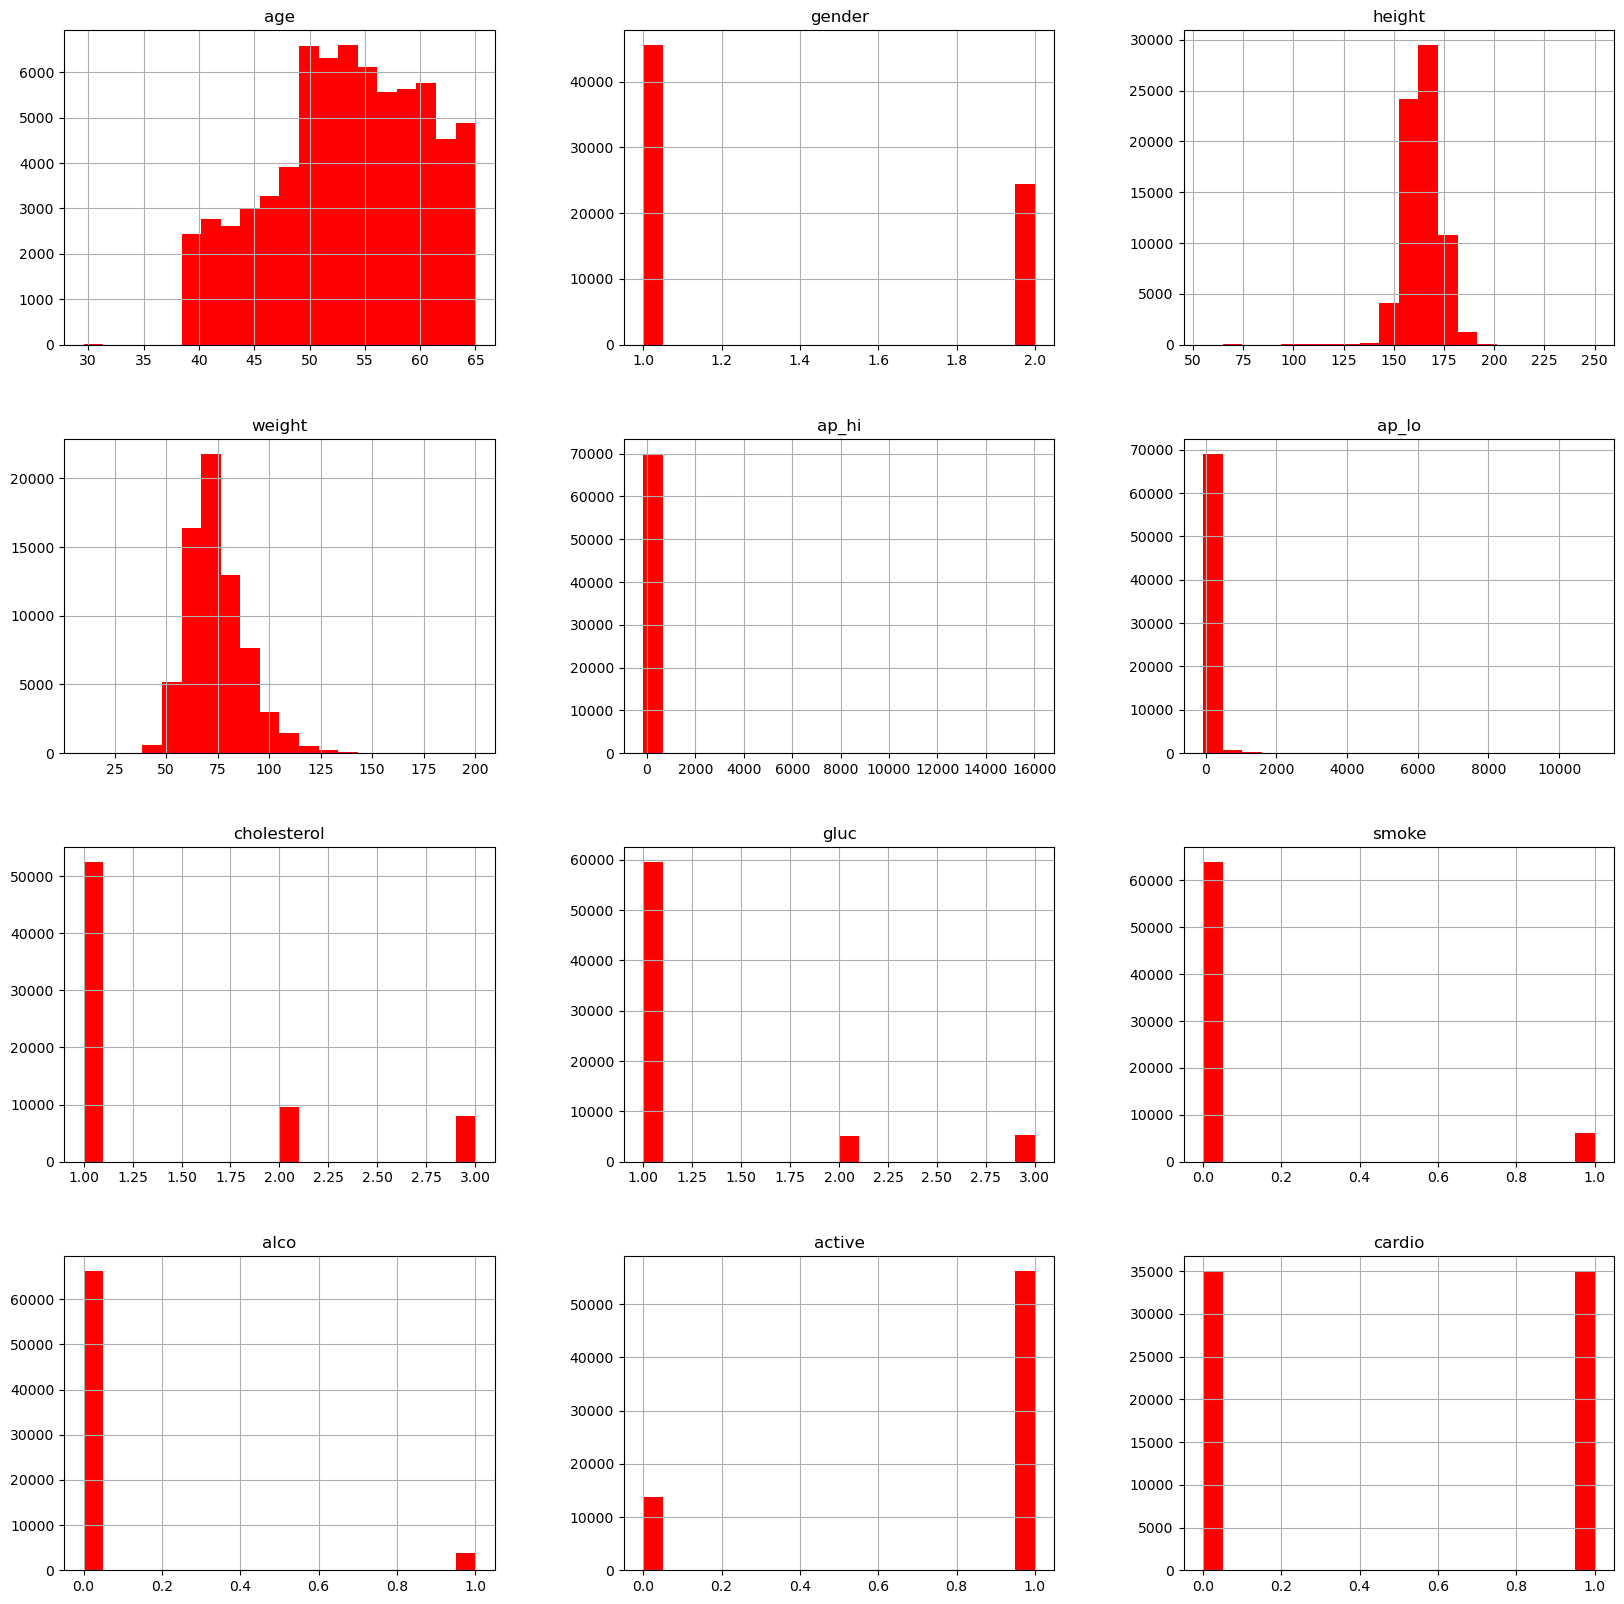

In [11]:
cardio_df.hist(bins = 20, figsize = (20,20), color = 'r')

In [12]:
# sns.pairplot(cardio_df)

<Axes: >

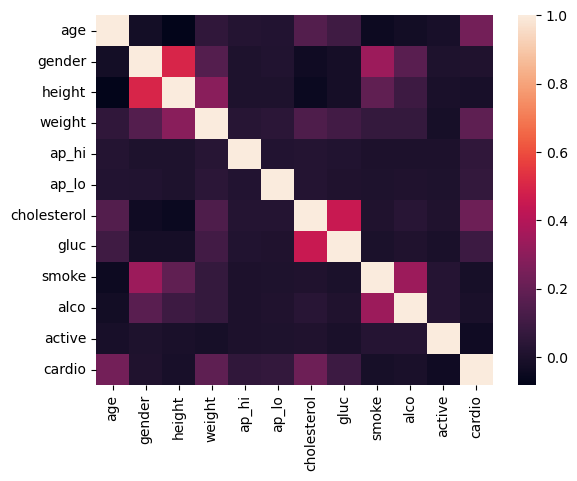

In [13]:
corr_matrix = cardio_df.corr()
sns.heatmap(corr_matrix)

# CREATE TRAINING AND TESTING DATASET

In [14]:
# split the dataframe into target and features

df_target = cardio_df['cardio']
df_final = cardio_df.drop(columns =['cardio'])

In [15]:
cardio_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [16]:
df_final.shape

(70000, 11)

In [17]:
df_target.shape

(70000,)

In [18]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size = 0.2)

In [19]:
X_train.shape

(56000, 11)

In [20]:
y_train.shape

(56000,)

In [21]:
X_test.shape

(14000, 11)

In [22]:
X_test.shape

(14000, 11)

# TRAIN AND TEST XGBOOST MODEL IN LOCAL MODE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [23]:
# install xgboost

!pip install xgboost

In [24]:
# use xgboost model in local mode

# normalization and scaling were not perfored since XGBoost is not sensitive to this.
# XGboost is a type of ensemble algorithms and works by selecting thresholds or cut points on features to split a node. 
# It doesn't really matter if the features are scaled or not.


from xgboost import XGBClassifier

# model = XGBClassifier(learning_rate=0.01, n_estimators=500, max_depth=20)
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
# make predictions on test data

predict = model.predict(X_test)

In [26]:
predict

array([0, 1, 0, ..., 1, 0, 1])

<Axes: >

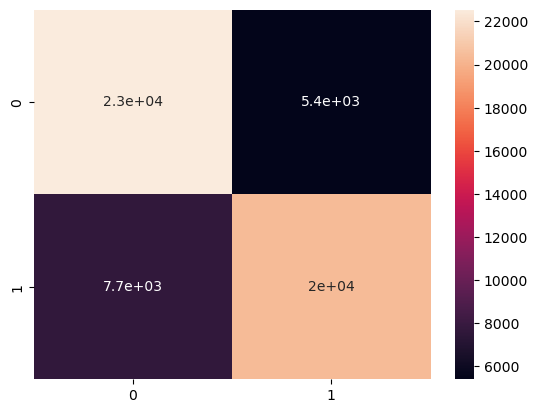

In [27]:
# Assess trained model performance on training dataset
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True)

In [28]:
# print metrics for training dataset

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

Precision = 0.7903938595131028
Recall = 0.7269583199629194
Accuracy = 0.7666964285714286


In [29]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7425590671985272
Recall = 0.6982111944604732
Accuracy = 0.7307142857142858


<Axes: >

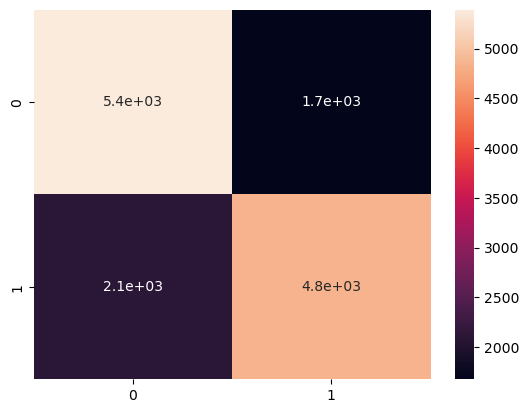

In [30]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

- Attempt to tune the XGBoost classifier using gridsearch, start with the param_grid

In [31]:
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [32]:
from sklearn.model_selection import GridSearchCV


In [33]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    learning_rate=0.01,
    n_estimators=500
)

In [34]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [35]:
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=500,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 5], 'max_depth': [3, 4, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=True)

In [36]:
y_predict_optim = grid_search.predict(X_test)

In [37]:
y_predict_optim

array([0, 1, 1, ..., 1, 0, 1])

In [38]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))

Precision = 0.7470233493118912
Recall = 0.6969128678592037
Accuracy = 0.7330714285714286


# PERFORM DIMENSIONALITY REDUCTION USING PCA ( USING SAGEMAKER)

In [39]:

import sagemaker
import boto3
from sagemaker import Session

# create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = 'sagemaker-projects-2024'
prefix = 'pca'  # prefix is the subfolder within the bucket.

# get the execution role for the notebook instance.
role = sagemaker.get_execution_role()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [40]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker PCA

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
df_matrix = df_final.to_numpy() # convert the dataframe into 2-dimensional array
smac.write_numpy_to_dense_tensor(buf, df_matrix)

# When writing to in-memory byte arrays, it increments 1 every time the write is performed to it
# Reset that back to zero

buf.seek(0)

0

In [41]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file 
 
key = 'pca'

# following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)


print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-projects-2024/pca/train/pca


In [42]:
# create output placeholder in S3 bucket to store the PCA output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-projects-2024/pca/output


In [43]:
# This code is used to get the training container of sagemaker built-in algorithms
# the name of the algorithmt be used should be specified

# Obtain a reference to the pca container image
# All models are named estimators

from sagemaker.image_uris import retrieve
container = retrieve("pca", boto3.Session().region_name)


In [44]:
pca = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.c4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# tune parameters like the number of features: mode of algorithm, mini batch size and number of pca components


pca.set_hyperparameters(feature_dim=11,
                        num_components=6,
                        subtract_mean=False,
                        algorithm_mode='regular',
                        mini_batch_size=100)


# Pass in the training data from S3 to train the pca model


pca.fit({'train': s3_train_data})

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: pca-2024-03-16-19-32-35-505


2024-03-16 19:32:35 Starting - Starting the training job...
2024-03-16 19:32:51 Starting - Preparing the instances for training...
2024-03-16 19:33:28 Downloading - Downloading input data...
2024-03-16 19:33:58 Downloading - Downloading the training image.........
2024-03-16 19:35:36 Training - Training image download completed. Training in progress.
2024-03-16 19:35:36 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[03/16/2024 19:35:29 INFO 140451096172352] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', 

MINI CHALLENGE:
 - Retrain the model with the following number of components 5, 4, and 7 

# DEPLOY THE TRAINED PCA MODEL 

In [45]:
# Deploy the model to perform inference 

pca_reduction = pca.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: pca-2024-03-16-19-36-18-089
INFO:sagemaker:Creating endpoint-config with name pca-2024-03-16-19-36-18-089
INFO:sagemaker:Creating endpoint with name pca-2024-03-16-19-36-18-089


------!

In [50]:
# for serializing data for an inference endpoint
from sagemaker.serializers import CSVSerializer

# for deserializing data returned from an inference endpoint
from sagemaker.deserializers import JSONDeserializer

from sagemaker.predictor import Predictor

predictor = Predictor(endpoint_name='pca-2024-03-16-19-36-18-089',

                      sagemaker_session=Session(),

                      serializer=CSVSerializer(), # Serialize data to a CSV-formatted string

                      deserializer=JSONDeserializer())# Deserialize JSON data from an inference endpoint into a Python object.

In [51]:
# make prediction on the test data

result = predictor.predict(np.array(df_final))

In [52]:
result # results are in Json format

{'projections': [{'projection': [-0.2891036570072174,
    3.9943747520446777,
    -12.549570083618164,
    64.24058532714844,
    36.82109451293945,
    -217.8480682373047]},
  {'projection': [1.0957019329071045,
    -4.777677059173584,
    12.364439010620117,
    44.58211135864258,
    45.66633987426758,
    -241.0251007080078]},
  {'projection': [1.336683988571167,
    1.7997606992721558,
    -9.735824584960938,
    53.424842834472656,
    55.75396728515625,
    -223.01675415039062]},
  {'projection': [-0.4163884222507477,
    6.149697303771973,
    5.682126998901367,
    43.042396545410156,
    45.00962448120117,
    -257.2431640625]},
  {'projection': [-0.14980435371398926,
    2.6750032901763916,
    -13.209842681884766,
    63.61091995239258,
    44.3466911315918,
    -192.79931640625]},
  {'projection': [0.8930057883262634,
    -10.548048973083496,
    -2.894824981689453,
    50.40694808959961,
    40.3013801574707,
    -217.75537109375]},
  {'projection': [0.9225766658782959,
 

In [53]:
# Since the results are in Json format, we access the scores by iterating through the scores in the predictions
predictions = np.array([r['projection'] for r in result['projections']])

In [54]:
predictions

array([[-2.89103657e-01,  3.99437475e+00, -1.25495701e+01,
         6.42405853e+01,  3.68210945e+01, -2.17848068e+02],
       [ 1.09570193e+00, -4.77767706e+00,  1.23644390e+01,
         4.45821114e+01,  4.56663399e+01, -2.41025101e+02],
       [ 1.33668399e+00,  1.79976070e+00, -9.73582458e+00,
         5.34248428e+01,  5.57539673e+01, -2.23016754e+02],
       ...,
       [ 9.36102509e-01,  6.50153160e+00,  2.10844498e+01,
         4.50918350e+01,  7.45691071e+01, -2.82263916e+02],
       [ 1.15454197e-03, -8.17430115e+00, -2.97180176e+00,
         5.16770020e+01,  5.14335823e+01, -2.34024872e+02],
       [ 3.68915290e-01, -1.09633231e+00, -4.88934517e+00,
         6.41318741e+01,  4.39791260e+01, -2.28002136e+02]])

In [55]:
predictions.shape

(70000, 6)

In [56]:
# Delete the end-point

pca_reduction.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pca-2024-03-16-19-36-18-089
INFO:sagemaker:Deleting endpoint with name: pca-2024-03-16-19-36-18-089


# TRAIN AND EVALUATE XGBOOST MODEL ON DATA AFTER DIMENSIONALITY REDUCTION (USING SAGEMAKER)

In [57]:
predictions.shape

(70000, 6)

In [58]:
# Convert the array into dataframe in a way that target variable is set as the first column and is followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format

train_data = pd.DataFrame({'Target':df_target})
train_data

,Target
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [59]:
for i in range(predictions.shape[1]):
    train_data[i] = predictions[:,i]

In [60]:
train_data.head()

,Target,0,1,2,3,4,5
0,0,-0.289104,3.994375,-12.549570,64.240585,36.821095,-217.848068
1,1,1.095702,-4.777677,12.364439,44.582111,45.666340,-241.025101
2,1,1.336684,1.799761,-9.735825,53.424843,55.753967,-223.016754
3,1,-0.416388,6.149697,5.682127,43.042397,45.009624,-257.243164
4,0,-0.149804,2.675003,-13.209843,63.610920,44.346691,-192.799316


In [61]:
train_data_size = int(0.9 * train_data.shape[0])
train_data_size

63000

In [62]:
# shuffle the data in dataframe and then split the dataframe into train, test and validation sets.

import sklearn

train_data = sklearn.utils.shuffle(train_data)
train, test, valid = train_data[:train_data_size], train_data[train_data_size:train_data_size + 3500], train_data[train_data_size + 3500:]


In [63]:
train.shape, test.shape,valid.shape

((63000, 7), (3500, 7), (3500, 7))

In [64]:
X_test, y_test = test.drop(columns = ['Target']), test['Target']

In [65]:
# save train_data and validation_data as csv files

train.to_csv('train.csv',header = False, index = False)
valid.to_csv('valid.csv',header = False, index = False)

In [66]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

In [67]:
# read the data from csv file and then upload the data to s3 bucket
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


uploaded training data location: s3://sagemaker-projects-2024/XGBoost-Classifier/train/XGBoost-Classifier


In [68]:
# reading the data from csv file and then upload the data to s3 bucket
with open('valid.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'valid', key)).upload_fileobj(f)

# print out the validation data location in s3
s3_valid_data = 's3://{}/{}/valid/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_valid_data))

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


uploaded validation data location: s3://sagemaker-projects-2024/XGBoost-Classifier/valid/XGBoost-Classifier


In [69]:
# creates output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-projects-2024/XGBoost-Classifier/output


In [70]:

# This code is used to get the training container of sagemaker built-in algorithms
# need to specify the name of the algorithm to be used

# obtain a reference to the XGBoost container image
# all regression models are named estimators

container = sagemaker.image_uris.retrieve('xgboost',boto3.Session().region_name,'1.7-1') # Latest version of XGboost

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [71]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training


Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                       role, 
                                       instance_count=1, 
                                       instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 

Xgboost_classifier.set_hyperparameters(max_depth=3,
                           objective='multi:softmax',
                           num_class= 2,
                           eta = 0.5,
                           num_round = 150
                           )

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [72]:
# Create "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.inputs.TrainingInput(s3_data=s3_train_data, content_type='csv', s3_data_type='S3Prefix')
valid_input = sagemaker.inputs.TrainingInput(s3_data=s3_validation_data, content_type='csv', s3_data_type='S3Prefix')

Xgboost_classifier.fit({'train': train_input, 'validation': valid_input})


See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-03-16-19-54-36-197


2024-03-16 19:54:36 Starting - Starting the training job...
2024-03-16 19:54:51 Starting - Preparing the instances for training...
2024-03-16 19:55:31 Downloading - Downloading input data......
2024-03-16 19:56:11 Downloading - Downloading the training image......
2024-03-16 19:57:11 Training - Training image download completed. Training in progress..[2024-03-16 19:57:27.440 ip-10-2-116-61.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-03-16 19:57:27.476 ip-10-2-116-61.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2024-03-16:19:57:27:INFO] Imported framework sagemaker_xgboost_container.training
[2024-03-16:19:57:27:INFO] Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
[2024-03-16:19:57:27:INFO] No GPUs detected (normal if no gpus installed)
[2024-03-16:19:57:27:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-03-16:19:57:27:INFO] Determined 0 GPU(s) available on the ins

# DEPLOY AND TEST THE TRAINED XGBOOST MODEL 

In [73]:
# Deploy the model to perfrom inference 

Xgboost_classifier = Xgboost_classifier.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-03-16-19-58-18-675
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-03-16-19-58-18-675
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-03-16-19-58-18-675


------!

In [77]:
from sagemaker.predictor import Predictor
from sagemaker.serializers import CSVSerializer


Xgboost_classifier = Predictor(endpoint_name='sagemaker-xgboost-2024-03-16-19-58-18-675')
Xgboost_classifier.serializer = CSVSerializer()

In [78]:
# make prediction

XGB_prediction = Xgboost_classifier.predict(np.array(X_test))

In [79]:
XGB_prediction

b'1.0\n1.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n1.0\n1.0\n1.0\n1.0\n1.0\n1.0\n1.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n1.0\n1.0\n0.0\n0.0\n1.0\n0.0\n0.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n1.0\n1.0\n0.0\n0.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n1.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n1.0\n0.0\n1.0\n0.0\n0.0\n0.0\n1.0\n0.0\n1.0\n1.0

In [80]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    # Decoding the byte string and splitting into lines while stripping whitespace
    lines = x.decode('utf-8').strip().split('\n')
    
    # Converting each line to a float and filtering out empty lines
    arr = np.array([float(line) for line in lines if line.strip()], dtype=np.float32)
    
    # Reshaping the array to two dimensions
    return arr.reshape(-1, 1)

In [81]:
predicted_values = bytes_2_array(XGB_prediction)

In [82]:
predicted_values

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [83]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [84]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [85]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))

Precision = 0.728272104914546
Recall = 0.7276560465295492
Accuracy = 0.7277142857142858


<Axes: >

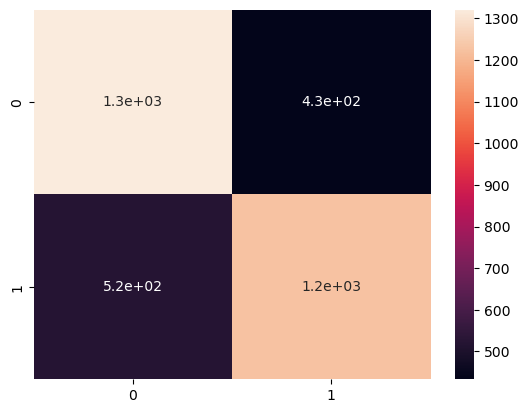

In [86]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
plt.figure()
sns.heatmap(cm, annot=True)

In [87]:
# Delete the end-point

Xgboost_classifier.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2024-03-16-19-58-18-675
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2024-03-16-19-58-18-675
